In [16]:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy.stats import norm

(array([0.00052432, 0.00052432, 0.00262162, 0.00969999, 0.02464321,
        0.04954858, 0.10407824, 0.19662136, 0.27291044, 0.3562779 ,
        0.41133188, 0.39324271, 0.31275904, 0.22231321, 0.13711063,
        0.07471612, 0.0322459 , 0.01205944, 0.00681621, 0.00157297]),
 array([-4.07256249, -3.69111867, -3.30967486, -2.92823105, -2.54678723,
        -2.16534342, -1.78389961, -1.4024558 , -1.02101198, -0.63956817,
        -0.25812436,  0.12331946,  0.50476327,  0.88620708,  1.2676509 ,
         1.64909471,  2.03053852,  2.41198233,  2.79342615,  3.17486996,
         3.55631377]),
 <BarContainer object of 20 artists>)

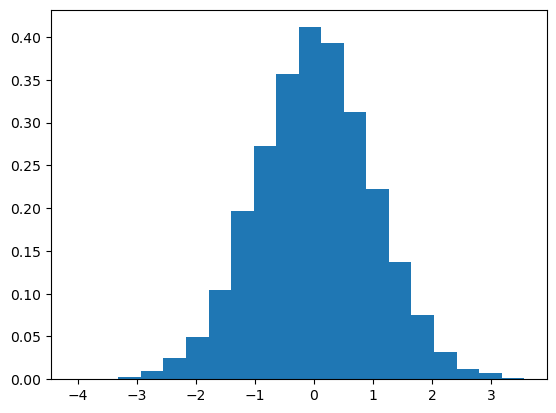

In [8]:
X = np.random.normal(size=10000)
plt.hist(X, bins=20, density=True)

In [10]:
def sturge_rule(input):
    n = 1 + 3.322 * math.log(len(input))
    n = math.ceil(n)
    return n

def doane_rule(input):
    t = np.array(input) - np.mean(input)
    b = np.sum(t**3) / np.power(np.sum(t**2), 3/2)
    s = np.std(input)
    n = math.log2(len(input)) + 1 + math.log2(1 + (math.sqrt(b) / (s * math.sqrt(b))))
    n = math.ceil(n)
    return n

def scott_rule(input):
    std = np.std(input)
    n = math.ceil(3.49 * std * math.pow(len(input), 1/3))
    return n

def rice_rule(input):
    n = math.ceil(2 * math.pow(len(input), 1/3))
    return n

def freedman_rule(input):
    q3 = np.quantile(input, 0.75)
    q1 = np.quantile(input, 0.25)
    iqr = q3 - q1

    n = math.ceil(2 * iqr * math.pow(len(input), 1/3))
    return n

In [11]:
def histogram(input: list, h: float=None, rule: str="sturge"):
    min_x = min(input)
    max_x = max(input)
    rule_dict = {
        "sturge": sturge_rule,
        "scott": scott_rule,
        "rice": rice_rule,
        "doane": doane_rule,
        "freedman": freedman_rule
    }
    if h is None:
        n = rule_dict[rule](input)
        h = (max_x - min_x) / n
    else:
        n = math.ceil((max_x - min_x) / h)
    
    # print("Number of bins:", n)
    # print("Width of bin:", h)
    # print("Min,Max", min(input), max(input))
    height = [0]*n
    bins = []

    for i in range(n):
        min_bin = min_x + h * i
        max_bin = min_x + h * (i + 1)
        bins.append(min_bin + (max_bin - min_bin) / 2)
        # print(f"Bin {i}, min={min_bin}, max={max_bin}")

    for x in input:
        i = int((x - min_x - 0.0001) / h)
        # print("Value:", x,"Index:", i)
        height[i] += 1
    
    height = np.array(height)
    density = height / (len(input) * h)
    return height, density, bins, n, h

Text(0.5, 1.0, 'Normal Distribution(u=0, s=1)')

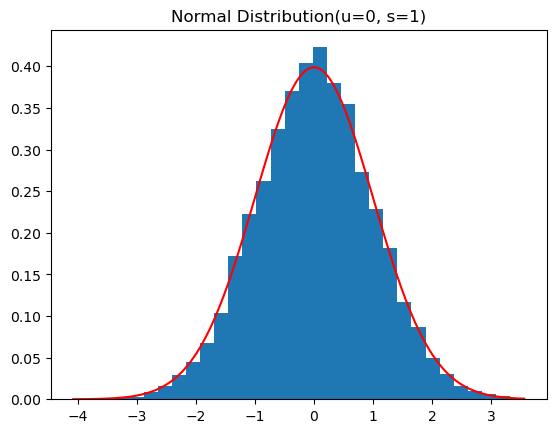

In [19]:
H, D, bins, N, W = histogram(X, rule="sturge")
T = np.linspace(min(X), max(X), 100)
U = norm.pdf(T)
plt.bar(bins, D, width=W)
plt.plot(T, U, c="r")
plt.title(f"Normal Distribution(u=0, s=1)")